In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Week 9 Practical

### Q 1
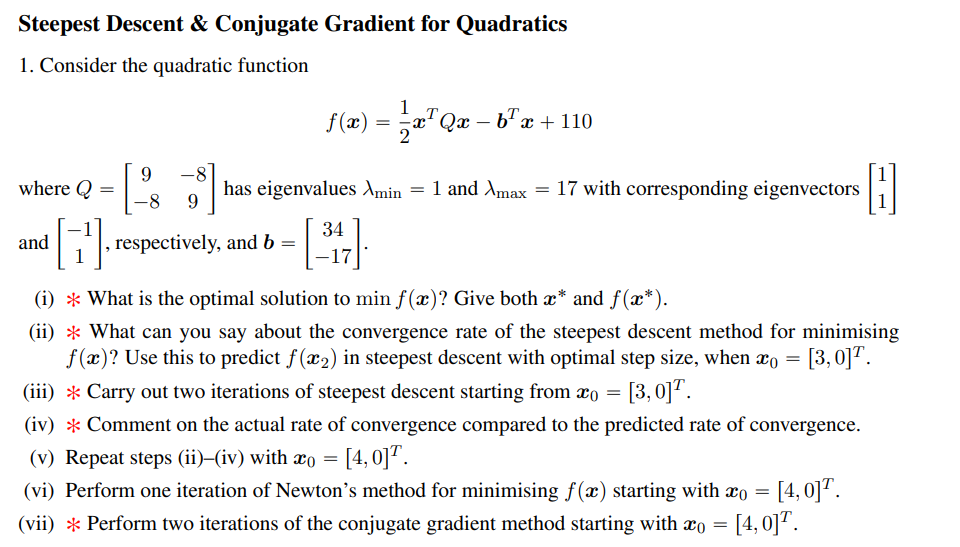

In [2]:
b = np.array([34,-17])
b = b.reshape(2,1)
Q = np.array([[9, -8], [-8, 9]])


def f(x):
    return 1/2*(x.T)@Q@(x) - b.T@(x) + 110


def Fx(xk,xopt):
    return f(xk) - f(xopt)

#### i)

In [3]:
xopt = np.linalg.inv(Q)@b
xopt = xopt.reshape(2,1)
print(xopt, f(xopt)[0])


[[10.]
 [ 7.]] [-0.5]


#### ii)
$$ p = \left (\frac{\lambda_{max}- \lambda_{min}}{\lambda_{max}+ \lambda_{min}} \right )^2 = 0.79$$
The covergance rate $P$ is not great however depending on the initial guess it might converge. Using $x_0 = \left (\begin{matrix}  3 \\ 0\end{matrix} \right )$, the routine converges in 1 iteration.

In [55]:

x0 = np.array([3,0])
x0 = x0.reshape(2,1)
d = (-(Q@x0 - b)).reshape(2,1)
a0 = ((d.T@d)/(d.T@Q@d))[0][0]
x1 = x0 + a0 * d
print(x1)

[[10.]
 [ 7.]]


In [4]:

convegance_ratio = []
x0 = np.array([4,0])
x0 = x0.reshape(2,1)
xk = x0
xk_1 = np.array([1000,1000]).reshape(2,1)
xarr = [x0]

for j in range(30):
    d = (-(Q@xk - b)).reshape(2,1)
    a0 = ((d.T@d)/(d.T@Q@d))[0][0]
    xk_1 = xk + a0*d
    xarr.append(xk_1)
    xk = xk_1

xarr= np.array(xarr).squeeze()
print(xarr.shape)

(31, 2)


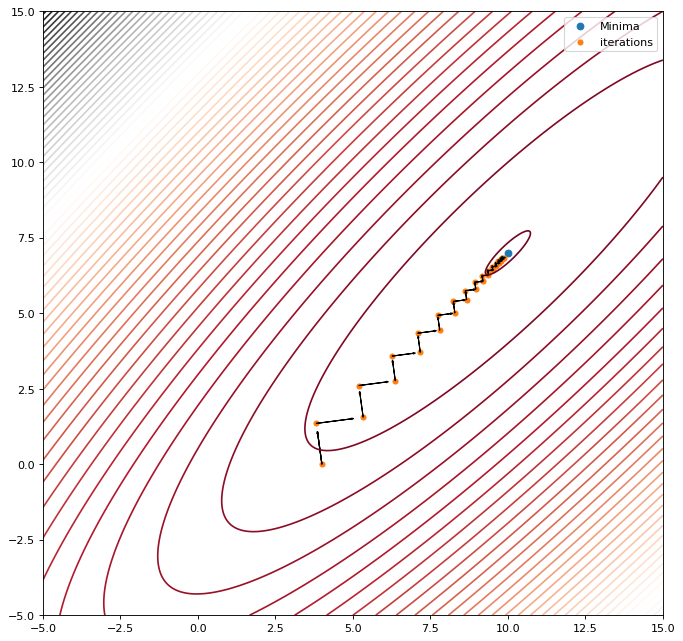

In [64]:
u = np.linspace(-5,15, 1000)
x, y = np.meshgrid(u,u)
z = 1/2*(9*x**2 - 8*x*y*2+9*y**2) - 34*x + 17*y + 110
plt.figure(figsize=(10,10), dpi = 80)
plt.contour(x,y,z, 60, cmap = "RdGy")
plt.scatter(xopt[0],xopt[1])
plt.scatter(xarr[:,0], xarr[:,1], s = 20)
for i in range(xarr[:,0].shape[0]-1):
    plt.arrow(xarr[i,0], xarr[i,1], (xarr[i+1,0] -xarr[i,0] )*0.75,(xarr[i+1,1] -xarr[i,1] )*0.75, head_width=0.05)
plt.arrow(xarr[0,0], xarr[0,1], (xarr[1,0] -xarr[0,0] )*0.75,(xarr[1,1] -xarr[0,1] )*0.75, head_width=0.05)
plt.legend(["Minima",  "iterations"])
plt.savefig("ters1.pdf")

### iv)
The actual covnergance $p_{actual} = 0.778 < 0.79$

In [15]:
actual_convergance = np.array([ Fx(xarr[i+1,:],xopt)/Fx(xarr[i,:],xopt) for i in range(xarr.shape[0]-1)]).ravel()

In [21]:
np.average(actual_convergance)

0.7780866901101025

### v) Using Newton's Method.

[array([[3],
       [0]]), array([[6.5],
       [3.5]]), array([[8.25],
       [5.25]]), array([[9.125],
       [6.125]]), array([[9.5625],
       [6.5625]]), array([[9.78125],
       [6.78125]]), array([[9.890625],
       [6.890625]]), array([[9.9453125],
       [6.9453125]]), array([[9.97265625],
       [6.97265625]]), array([[9.98632812],
       [6.98632812]]), array([[9.99316406],
       [6.99316406]]), array([[9.99658203],
       [6.99658203]])]


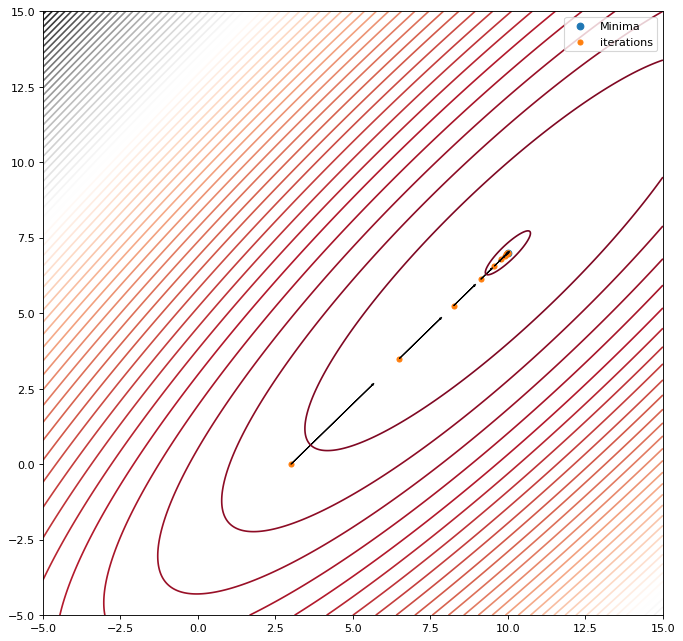

In [65]:
xk = x0
xk1 = x0
xarr2 = [x0]
for i in range(11):
    Hf = Q.T + Q
    gradf = (Q@xk - b).reshape(2,1)
    xk1 = xk - np.linalg.inv(Hf)@gradf
    xarr2.append(xk1)
    xk = xk1
print(xarr2)
xarr2= np.array(xarr2).squeeze()

u = np.linspace(-5,15, 1000)
x, y = np.meshgrid(u,u)
z = 1/2*(9*x**2 - 8*x*y*2+9*y**2) - 34*x + 17*y + 110
plt.figure(figsize=(10,10), dpi = 80)
plt.contour(x,y,z, 60, cmap = "RdGy")
plt.scatter(xopt[0],xopt[1])
plt.scatter(xarr2[:,0], xarr2[:,1], s = 20)
for i in range(xarr2[:,0].shape[0]-1):
    plt.arrow(xarr2[i,0], xarr2[i,1], (xarr2[i+1,0] -xarr2[i,0] )*0.75,(xarr2[i+1,1] -xarr2[i,1] )*0.75, head_width=0.05)
plt.legend(["Minima",  "iterations"])
plt.savefig("ters2.pdf")  
